In [1]:
import sys
import json
import base64
import numpy as np
from scipy import misc

In [2]:
from pathlib import Path

In [3]:
PATH = Path.cwd()

In [4]:
Path.home()

PosixPath('/home/paperspace')

In [5]:
# student_output = sys.argv[1]
student_output = PATH/'tester_data_car_only'

In [6]:
def decode(packet):
	img = base64.b64decode(packet)
	filename = PATH/'image.png'
	with open(filename, 'wb') as f:
			f.write(img)
	result = misc.imread(filename)
	return result

with open(PATH/'results.json') as json_data:
	ans_data = json.loads(json_data.read())
	json_data.close()

# Load student data
with open(student_output) as student_data:
	student_ans_data = json.loads(student_data.read())
	student_data.close()

frames_processed = 0

Car_TP = 0 # True Positives
Car_FP = 0 # Flase Positives
Car_TN = 0 # True Negatives
Car_FN = 0 # True Negatives

Road_TP = 0 # True Positives
Road_FP = 0 # Flase Positives
Road_TN = 0 # True Negatives
Road_FN = 0 # True Negatives

for frame in range(1,len(ans_data.keys())+1):

	truth_data_car =  decode(ans_data[str(frame)][0])
	truth_data_road =  decode(ans_data[str(frame)][1])
	student_data_car = decode(student_ans_data[str(frame)][0])
	student_data_road = decode(student_ans_data[str(frame)][1])

	Car_TP += np.sum(np.logical_and(student_data_car == 1, truth_data_car == 1))
	Car_FP += np.sum(np.logical_and(student_data_car == 1, truth_data_car == 0))
	Car_TN += np.sum(np.logical_and(student_data_car == 0, truth_data_car == 0))
	Car_FN += np.sum(np.logical_and(student_data_car == 0, truth_data_car == 1))

	Road_TP += np.sum(np.logical_and(student_data_road == 1, truth_data_road == 1))
	Road_FP += np.sum(np.logical_and(student_data_road == 1, truth_data_road == 0))
	Road_TN += np.sum(np.logical_and(student_data_road == 0, truth_data_road == 0))
	Road_FN += np.sum(np.logical_and(student_data_road == 0, truth_data_road == 1))

	frames_processed+=1


# Generate results
Car_precision = Car_TP/(Car_TP+Car_FP)/1.0
Car_recall = Car_TP/(Car_TP+Car_FN)/1.0
Car_beta = 2
Car_F = (1+Car_beta**2) * ((Car_precision*Car_recall)/(Car_beta**2 * Car_precision + Car_recall))
Road_precision = Road_TP/(Road_TP+Road_FP)/1.0
Road_recall = Road_TP/(Road_TP+Road_FN)/1.0
Road_beta = 0.5
Road_F = (1+Road_beta**2) * ((Road_precision*Road_recall)/(Road_beta**2 * Road_precision + Road_recall))

/home/paperspace/anaconda3/envs/lyft/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [7]:
ans = decode(ans_data['1'][0])

/home/paperspace/anaconda3/envs/lyft/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [8]:
import matplotlib.pyplot as plt

In [9]:
def plot_ans(index, car=0):
    st_ans = decode(student_ans_data[str(index)][car])
    ans = decode(ans_data[str(index)][car])
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 15))
    f.tight_layout()
    ax1.imshow(st_ans)
    ax1.set_title('Mine', fontsize=35)
    ax2.imshow(ans)
    ax2.set_title('Answer', fontsize=35)

/home/paperspace/anaconda3/envs/lyft/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


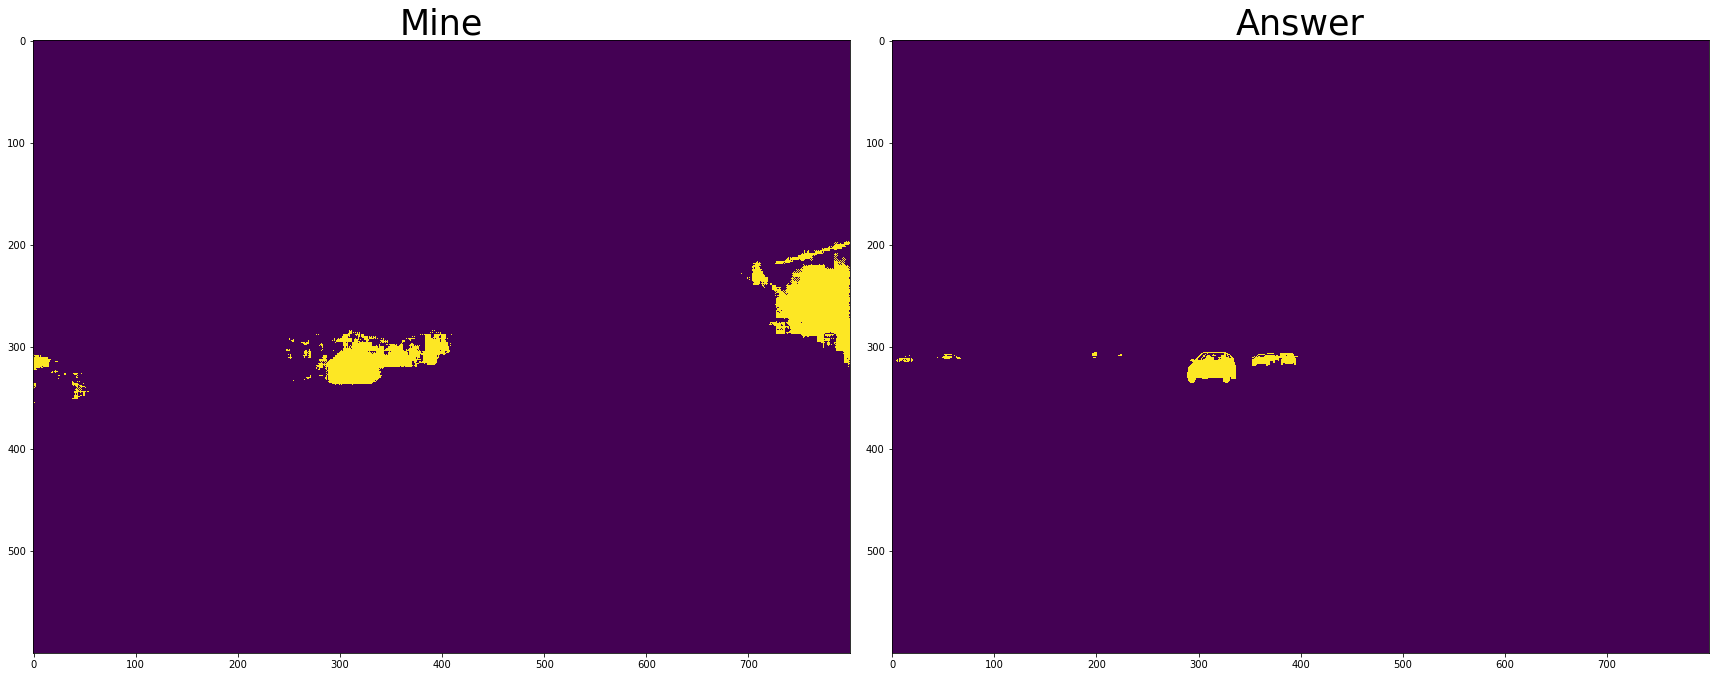

In [10]:
plot_ans(5, 0)

In [11]:
print(f'Car_TP: {Car_TP}, Car_FP: {Car_FP}, Car_TN: {Car_TN}, Car_FN: {Car_FN}')

Car_TP: 129962, Car_FP: 156955, Car_TN: 14079666, Car_FN: 33417


In [12]:
print ("Car F score: %05.3f  | Car Precision: %05.3f  | Car Recall: %05.3f  |\n\
Road F score: %05.3f | Road Precision: %05.3f | Road Recall: %05.3f | \n\
Averaged F score: %05.3f" %(Car_F,Car_precision,Car_recall,Road_F,Road_precision,Road_recall,((Car_F+Road_F)/2.0)))

Car F score: 0.691  | Car Precision: 0.453  | Car Recall: 0.795  |
Road F score: 0.246 | Road Precision: 0.207 | Road Recall: 0.988 | 
Averaged F score: 0.468
